In [288]:
def print_points_as_dots(coordinates):
    # Find the minimum and maximum coordinates
    min_x = min(coord[0] for coord in coordinates)
    max_x = max(coord[0] for coord in coordinates)
    min_y = min(coord[1] for coord in coordinates)
    max_y = max(coord[1] for coord in coordinates)

    # Create a grid
    grid = [[' ' for _ in range(min_x, max_x + 1)] for _ in range(min_y, max_y + 1)]

    # Mark the points on the grid
    for x, y in coordinates:
        grid[y - min_y][x - min_x] = '.'

    # Print the grid
    for row in grid:
        print(''.join(row))

# Example usage:
coordinates =  [[100,100],[200,200]]
print_points_as_dots(coordinates)

.                                                                                                    
                                                                                                     
                                                                                                     
                                                                                                     
                                                                                                     
                                                                                                     
                                                                                                     
                                                                                                     
                                                                                                     
                                                                                  

In [293]:
import random
import numpy as np
letters = 'True False'.split(' ')
items = []
for x in range(100):
    items.append(letters[random.randint(0,1)])
np.array(items)

array(['False', 'False', 'True', 'True', 'False', 'False', 'True', 'True',
       'False', 'False', 'False', 'False', 'True', 'False', 'False',
       'False', 'False', 'True', 'True', 'False', 'True', 'True', 'False',
       'False', 'False', 'False', 'False', 'True', 'True', 'True',
       'False', 'False', 'False', 'False', 'True', 'True', 'True',
       'False', 'True', 'True', 'True', 'True', 'True', 'False', 'True',
       'False', 'False', 'False', 'True', 'True', 'True', 'False', 'True',
       'True', 'True', 'False', 'True', 'False', 'True', 'False', 'False',
       'False', 'False', 'True', 'False', 'False', 'False', 'False',
       'True', 'True', 'True', 'True', 'True', 'True', 'True', 'True',
       'False', 'False', 'True', 'False', 'False', 'False', 'False',
       'True', 'True', 'True', 'False', 'True', 'False', 'False', 'True',
       'False', 'False', 'False', 'True', 'False', 'True', 'True', 'True',
       'False'], dtype='<U5')

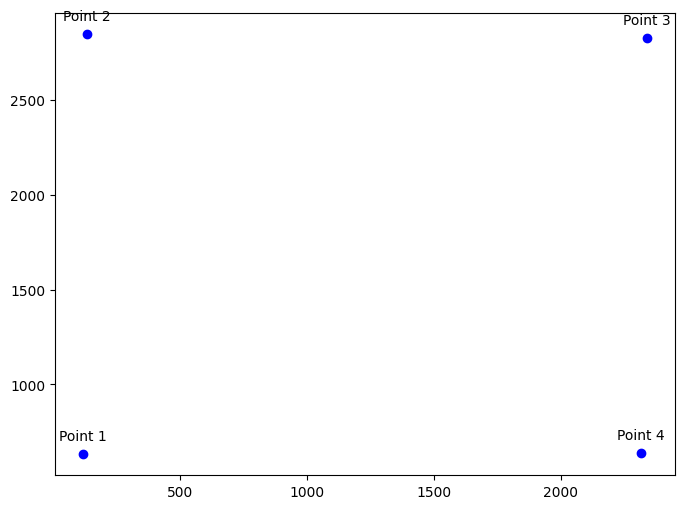

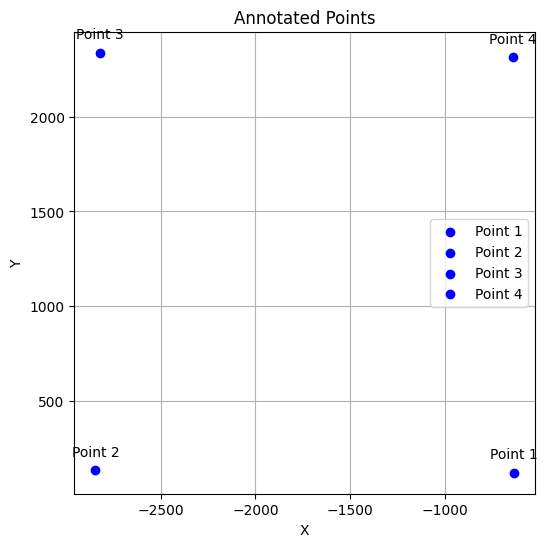

In [285]:
import matplotlib.pyplot as plt

# Coordinates of the points
#facing left
points = [
    [119, 632],
    [134, 2846],
    [2339, 2824],
    [2317, 637]
]
#facing top
points2 = [
    [739, 198],
    [1772, 208],
    [1802, 3580],
    [790, 3589]
]
#fliped
points3 = [
    [1569, 571],
    [810, 573],
    [804, 3134],
    [1670, 3112]
]
from numpy import array
points3_rot =rotate_points_90_degrees(points)
points4 = [[141, 0], [178, 152], [150, 4], [291, 11]]

# Plotting the points
plt.figure(figsize=(8, 6))
for i, point in enumerate(points):
    plt.scatter(point[0], point[1], label=f"Point {i+1}", color='blue')
    plt.annotate(f"Point {i+1}", (point[0], point[1]), textcoords="offset points", xytext=(0,10), ha='center')
plt.figure(figsize=(8, 6))
for i, point in enumerate(points3_rot):
    plt.scatter(point[0], point[1], label=f"Point {i+1}", color='blue')
    plt.annotate(f"Point {i+1}", (point[0], point[1]), textcoords="offset points", xytext=(0,10), ha='center')

plt.gca().set_aspect('equal', adjustable='box')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Annotated Points')
plt.legend()
plt.grid(True)
plt.show()

In [45]:
import numpy as np
def direction(p1,p2):
    p1,p2 = np.array(p1), np.array(p2)
    vector = p1-p2
    direction = vector / np.linalg.norm(vector)
    direction = np.round(direction)
    return direction
    

In [53]:
a=direction(points[0], points[1]) #facing left
a

array([-0., -1.])

In [264]:
def direction_between_points(points):
    def direction(p1, p2):
        p1, p2 = np.array(p1), np.array(p2)
        vector = p2 - p1
        direction = vector / np.linalg.norm(vector)
        direction = np.round(direction)
        return direction

    directions = []
    for i in range(len(points) - 1):  # Loop over all points except the last one
        directions.append(direction(points[i], points[i+1]))

    return np.array(directions)

In [242]:
direction(points2[0], points2[1]) # correct

array([-1., -0.])

In [265]:
correct = direction_between_points(points2)
correct

array([[ 1.,  0.],
       [ 0.,  1.],
       [-1.,  0.]])

In [276]:
direction_between_points(flip_points_horizontal(points3))

array([[ 1.,  0.],
       [ 0.,  1.],
       [-1., -0.]])

In [277]:
np.sum(direction_between_points(flip_points_horizontal(points3)) != correct)

0

In [278]:
def flip_points_horizontal(points):
    flipped_points = [[-point[0], point[1]] for point in points]
    return flipped_points
def flip_points_vertical(points):
    flipped_points = [[point[0], -point[1]] for point in points]
    return flipped_points
def rotate_points_90_degrees(points):
    rotated_points = [[-point[1], point[0]] for point in points]
    return rotated_points
def direction_between_points(points):
    def direction(p1, p2):
        p1, p2 = np.array(p1), np.array(p2)
        vector = p2 - p1
        direction = vector / np.linalg.norm(vector)
        direction = np.round(direction)
        return direction

    directions = []
    for i in range(len(points) - 1):  # Loop over all points except the last one
        directions.append(direction(points[i], points[i+1]))

    return np.array(directions)
def is_correct(directions, custom_correct=None):
    if custom_correct is None:
        correct = array([[ 1.,  0.],
       [ 0.,  1.],
       [-1.,  0.]])
    else:
        correct = custom_correct
    print('current')
    print(directions)
    print('correct')
    print(correct)
    if np.sum(directions != correct) == 0:
        return True
    else:
        return False

def operate_orient(points):
    operations = [flip_points_horizontal,flip_points_vertical,rotate_points_90_degrees]
    operations_actual = ['horizontal flip', 'vertical flip', '90 degrees rotate']
    operation_sequence = []
    ground = direction_between_points(points)
    current = []
    operated_current = None
    while True:
        stop = False
        for op_i in range(len(operations)):
            current = operations[op_i](points)
            print(operations[op_i])
            operation_sequence.append(operations_actual[op_i])
            directions = direction_between_points(current)
            if is_correct(directions):
                stop = True
                print("STOPING")
                break
        if stop:
            break
        points = current
        if is_correct(ground, direction_between_points(current)):
            break
        
    return operation_sequence

In [279]:
operate_orient(points)

<function flip_points_horizontal at 0x0000020D94794550>
current
[[-0.  1.]
 [-1. -0.]
 [ 0. -1.]]
correct
[[ 1.  0.]
 [ 0.  1.]
 [-1.  0.]]
<function flip_points_vertical at 0x0000020D94795BD0>
current
[[ 0. -1.]
 [ 1.  0.]
 [-0.  1.]]
correct
[[ 1.  0.]
 [ 0.  1.]
 [-1.  0.]]
<function rotate_points_90_degrees at 0x0000020D94796E60>
current
[[-1.  0.]
 [ 0.  1.]
 [ 1. -0.]]
correct
[[ 1.  0.]
 [ 0.  1.]
 [-1.  0.]]
current
[[ 0.  1.]
 [ 1. -0.]
 [-0. -1.]]
correct
[[-1.  0.]
 [ 0.  1.]
 [ 1. -0.]]
<function flip_points_horizontal at 0x0000020D94794550>
current
[[ 1.  0.]
 [-0.  1.]
 [-1. -0.]]
correct
[[ 1.  0.]
 [ 0.  1.]
 [-1.  0.]]
STOPING


['horizontal flip', 'vertical flip', '90 degrees rotate', 'horizontal flip']

In [49]:
direction(points3[0], points3[1]) # flipped

array([ 1., -0.])

In [281]:
direction_between_points(flip_points_horizontal(flip_points_vertical(rotate_points_90_degrees(flip_points_horizontal(points)))))

array([[ 1.,  0.],
       [-0.,  1.],
       [-1., -0.]])

In [43]:
import numpy as np

# Define the coordinates of the points
point1_set1 = np.array([1, 2])  # Coordinates of the first point in the first set
point2_set1 = np.array([3, 4])  # Coordinates of the second point in the first set
point1_set2 = np.array([5, 6])  # Coordinates of the first point in the second set
point2_set2 = np.array([7, 8])

# Calculate the vectors
vector_set1_to_set2 = point1_set2 - point1_set1
vector_set2_to_set1 = point1_set1 - point1_set2

# The direction is the same for both vectors
#direction = vector_set1_to_set2 / np.linalg.norm(vector_set1_to_set2)

print("Direction from set 1 to set 2:", direction(point1_set1, point1_set2))

Direction from set 1 to set 2: [-0.71 -0.71]


In [63]:
def rotate_points(points, center, angle):
    # Convert angle to radians
    angle_rad = np.radians(angle)
    
    # Convert center point to numpy array
    center = np.array(center)
    
    # Initialize list to store rotated points
    rotated_points = []
    
    # Iterate through each point
    for point in points:
        # Convert point to numpy array
        point = np.array(point)
        
        # Translate point to origin (subtract center)
        translated_point = point - center
        
        # Perform rotation
        rotated_x = translated_point[0] * np.cos(angle_rad) - translated_point[1] * np.sin(angle_rad)
        rotated_y = translated_point[0] * np.sin(angle_rad) + translated_point[1] * np.cos(angle_rad)
        
        # Translate point back to original position (add center)
        rotated_point = np.array([rotated_x, rotated_y]) + center
        
        # Append rotated point to list
        rotated_points.append(rotated_point)
    
    return rotated_points

In [70]:
def calculate_center(points):
    # Convert points to numpy array for easy manipulation
    points_array = np.array(points)

    # Calculate the mean of x-coordinates and y-coordinates
    center_x = np.mean(points_array[:, 0])
    center_y = np.mean(points_array[:, 1])

    center = [center_x, center_y]
    print(center)
    return center

In [76]:
points3 = [
    [1569, 571],
    [810, 573],
    [804, 3134],
    [1670, 3112]
]

center = calculate_center(points3)  # Center of rotation
angle = 90  # Angle of rotation in degrees

rotated_points = rotate_points(points3, center, angle)
print("Rotated points:", rotated_points)

[1213.25, 1847.5]
Rotated points: [array([2489.75, 2203.25]), array([2487.75, 1444.25]), array([ -73.25, 1438.25]), array([ -51.25, 2304.25])]


In [88]:
def flip_points(points):
    flipped_points = [[point[1], point[0]] for point in points]
    return flipped_points

# Example usage
points3 = [
    [1569, 571],
    [810, 573],
    [804, 3134],
    [1670, 3112]
]

flipped_points = flip_points(points3)
print("Flipped points:", flipped_points)

Flipped points: [[571, 1569], [573, 810], [3134, 804], [3112, 1670]]


In [98]:
def flip_points(points):
    flipped_points = [[point[1], point[0]] for point in points]
    return flipped_points

# Example usage
points3 = [
    [1569, 571],
    [810, 573],
    [804, 3134],
    [1670, 3112]
]

flipped_points = flip_points(points3)
print("Flipped points:", flipped_points)

Flipped points: [[571, 1569], [573, 810], [3134, 804], [3112, 1670]]


In [94]:
def rotate_points_90_degrees(points):
    rotated_points = [[-point[1], point[0]] for point in points]
    return rotated_points

# Example usage
points3 =[[-571, 1569], [-573, 810], [-3134, 804], [-3112, 1670]]

rotated_points = rotate_points_90_degrees(points3)
print("Rotated points by 90 degrees:", rotated_points)

Rotated points by 90 degrees: [[-1569, -571], [-810, -573], [-804, -3134], [-1670, -3112]]


In [105]:
def flip_points_horizontal(points):
    flipped_points = [[-point[0], point[1]] for point in points]
    return flipped_points

# Example usage
points3 = [
    [1569, 571],
    [810, 573],
    [804, 3134],
    [1670, 3112]
]

flipped_points = flip_points_horizontal(points3)
print("Horizontally flipped points:", flipped_points)


Horizontally flipped points: [[-1569, 571], [-810, 573], [-804, 3134], [-1670, 3112]]


In [110]:
def flip_points_vertical(points):
    flipped_points = [[point[0], -point[1]] for point in points]
    return flipped_points

# Example usage
points3 = [
    [1569, 571],
    [810, 573],
    [804, 3134],
    [1670, 3112]
]

flipped_points = flip_points_vertical(points3)
print("Vertically flipped points:", flipped_points)


Vertically flipped points: [[1569, -571], [810, -573], [804, -3134], [1670, -3112]]


In [152]:
import itertools

def direction(p1, p2):
    p1, p2 = np.array(p1), np.array(p2)
    vector = p1 - p2
    direction = vector / np.linalg.norm(vector)
    direction = np.round(direction)
    return direction

def brute_force_operations(points, condition):
    # Generate all possible combinations of rotations and flips
    operations = list(itertools.product([0, 90, 180, 270], [False, True]))

    # Apply each combination of operations
    for rotation_angle, flip_vertical in operations:
        rotated_points = points.copy()
        
        # Rotate points
        if rotation_angle != 0:
            center = np.mean(rotated_points, axis=0)
            angle_rad = np.radians(rotation_angle)
            rotated_points = [(np.cos(angle_rad) * (p[0] - center[0]) - np.sin(angle_rad) * (p[1] - center[1]) + center[0],
                               np.sin(angle_rad) * (p[0] - center[0]) + np.cos(angle_rad) * (p[1] - center[1]) + center[1]) for p in rotated_points]
        
        # Flip points vertically
        if flip_vertical:
            rotated_points = [(p[0], -p[1]) for p in rotated_points]
        
        # Check condition
        if condition(rotated_points):
            return rotated_points
    
    return None

# Example condition: Check if direction between first and second points is [0, 1]
def condition(points):
    return np.array_equal(direction(points[0], points[1]), [0, 1])

# Example usage
points = [
    [1569, 571],
    [810, 573],
    [804, 3134],
    [1670, 3112]
]

result = brute_force_operations(points, condition)
if result:
    print("Condition met with transformed points:", result)
else:
    print("Condition not met.")

Condition met with transformed points: [(2489.75, 2203.25), (2487.75, 1444.25), (-73.25, 1438.25), (-51.25, 2304.25)]
